<a href="https://colab.research.google.com/github/jhejna/mlworkshop/blob/master/workshop_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Workshop - SOLUTIONS
This tutorial we guide you through all aspects of ML covered in the presentation (and maybe more!)

Note that during the course of the tutorial you may need to restart your kernel if python begins to take up too much memory.

#### Notice:
The goal of this notebook is to teach you the basics of making ML models in Tensorflow 2 and the Keras high level API. As such, we won't touch on data cleaning and creating effective datasets, which is a HUGE component of machine learning in the real world.

In [0]:
# Load various libraries and setup
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.datasets import fashion_mnist, imdb, mnist
from matplotlib import pyplot as plt
import sklearn

def clear_graph():
    tf.keras.backend.clear_session()

%matplotlib inline

# Section 1: The Fashion MNIST Dataset
This data set is full of 28x28 images of various clothing items. We're using it for its consistency and essentially, lack of features, which makes it faster to train than most other datasets! it's also a lot more exciting than the MNIST digits dataset (and harder to classify).

First, we're going to load the dataset and see what it looks like!

Training shape (60000, 28, 28)
labels shape (60000,)
X data looks like this!


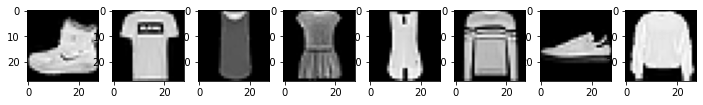

y data looks like this
[9 0 0 3 0 2 7 2]
The data class are as follows:
0 = T-shirt/top
1 = Trouser
2 = Pullover
3 = Dress
4 = Coat
5 = Sandal
6 = Shirt
7 = Sneaker
8 = Bag
9 = Ankle boot


<Figure size 432x288 with 0 Axes>

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", \
          "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Training shape", x_train.shape)
print("labels shape", y_train.shape)
print("X data looks like this!")
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(12,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='gray')
plt.show()
print("y data looks like this")
print(y_train[:8])
plt.clf()

print("The data class are as follows:")
for i in range(len(labels)):
    print("%d = %s" % (i, labels[i]))


### Preprocessing Fashion MNIST
We need to do a few operations to the dataset.

#### 1. Floatify - the data is currenlty in ints -- let's make it floats
#### 2. One-hot vector encode the labels
So each one of our labels is unique and of the same size, we do what's called one hot encoding. This turns the label i into a vector of length c (where c is the number of classes) that is all zeros except a one at position i.

#### 3. Flattening Data
For DENSE NETWORKS ONLY, we're going to want flattened data! (aka each image is in a single column vector)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = len(labels)

# one-hot encode the training and testing labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# This is dense network! We want it to take in a column vector that is just the image. 
# So, we reshape the image by stacking!
im_width, im_height = x_train[0].shape
x_train_flat = x_train.reshape(len(x_train), im_width*im_height)
x_test_flat = x_test.reshape(len(x_test), im_width*im_height)
print("Flattened shape: ", x_train_flat.shape)

Flattened shape:  (60000, 784)


### Defining a basic model with Keras
See this link for more detailed info: https://keras.io/getting-started/functional-api-guide/
#### 1. Define the input layer.
Usually this is keras.layers.Input !
#### 2. Add to the graph
This is where the model works! Layers are callable objects. We construct layers as follows:
```
input = Input(shape=, etc.)
first_layer = Dense(shape=, etc.)(input)
```
By feeding the previous layer to the next layer, we connect their nodes in the computation graph!
See the layers API: https://keras.io/layers/core/
If you want, you can also mess around with layer initializers (how to initialize the weights etc.)
Also look at activation functions: https://keras.io/activations/
#### 3. Get the output.
This is the end of your model, it's often referred to as the "logits"
#### 4. Create a callable model object. 
`model = models.Model(input=input, output=output)`
#### 5. Select a loss function
https://keras.io/losses/
Select a loss function to give the model. This is added at the end of the graph!
#### 6. Select an optimizer!
https://keras.io/optimizers/
These are usually just variants of gradient descent. Note that the keras model API also lets you do all of this within `model.compile`
#### Call fit to train!


### A note on hyper-parameters
Hyper-parameters are values related to the optimizer, loss, and other parts of the model that we can change to improve accuracy or convergence. We use whats called a _validdation_ dataset to asses how good our hyperparameters are. This is usually just a random subset of the training dataset, often around 20 percent.

### Example
Below is an example model for the fashion MNIST dataset. It's quite bad. This is to show you how to use the keras API.

Note that this current model is literally just doing multiclass logistic regression! Its just a single dense layer connected to 10 output nodes with the softmax multiclass generalization of the logistic function.

Your task is to improve the model later on!

In [0]:
### Model Parameters ###
batch_size = 64
epochs = 3
lr = 0.01

clear_graph()
# input layer to take in image
inputs = layers.Input(shape=(784,))
# A single dense layer (this is the output)
output = layers.Dense(num_classes, activation='softmax')(inputs)

model = models.Model(inputs=inputs, outputs=output)
optimizer = optimizers.SGD(lr=lr, decay=1e-6)
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train_flat, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 3s 3ms/step - loss: 1.0280 - accuracy: 0.6820 - val_loss: 0.7627 - val_accuracy: 0.7597
Epoch 2/3
750/750 [==============================] - 2s 3ms/step - loss: 0.7081 - accuracy: 0.7761 - val_loss: 0.6578 - val_accuracy: 0.7893
Epoch 3/3
750/750 [==============================] - 2s 3ms/step - loss: 0.6348 - accuracy: 0.7975 - val_loss: 0.6108 - val_accuracy: 0.8018


### Now, we test the model!
Notice that you'll probably get an accuracy that's a bit lower than your training or validation accuracy. This is because of _overfitting_.

313/313 [==============================] - 1s 2ms/step - loss: 0.6327 - accuracy: 0.7900
Model Overall scores: 
Test loss: 0.6327072978019714
Test accuracy: 0.7900000214576721
Prediction probabilities:  [2.5288403e-04 2.6361991e-04 8.7131205e-04 4.7431182e-04 2.9681718e-03
 1.9627590e-01 1.4541263e-03 1.6932631e-01 4.5312837e-02 5.8280045e-01]
Predicted class Ankle boot was class Ankle boot


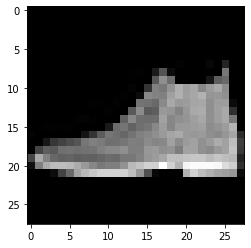

In [0]:
scores = model.evaluate(x_test_flat, y_test)
print("Model Overall scores: ")
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Example inference on a single image!
# Note: we have to run expand_dims as keras expects batched input!
pred = model.predict(np.expand_dims(x_test_flat[0], axis=0))[0]
# Preds will return the logits or the values at the output layer! 
# The index with the max probability is our selected class
print("Prediction probabilities: ", pred)
pred = np.argmax(pred)
print("Predicted class", labels[pred], "was class", labels[np.argmax(y_test[0])])
plt.imshow(x_test[0], cmap='gray')

## Task 1: A Dense Model
Try to expand on the model I made to achieve higher accuracy using Dense Layers. I recommend looking into the following:
1. Adding more Layers
2. The ReLu activation function
3. The dropout layer
4. The RMS prop or adagrad optimizers
5. Adjusting hyperparameters (learning rate, decay rate, etc.)
6. Training more?

### For convenience, I've repasted the starter code!
I also seperated the training part from the model definition as it's very common to get shape errors!

In [0]:
# Re-load the data:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
# one-hot encode the training and testing labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Model Parameters ###
batch_size = 128
epochs = 10
lr = None

clear_graph()

# input layer to take in image
inputs = layers.Input(shape=(784,))

output = layers.Dense(512, activation='relu')(inputs)
output = layers.Dropout(0.2)(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dropout(0.2)(output)
output = layers.Dense(num_classes, activation='softmax')(output)

model = models.Model(inputs=inputs, outputs=output)
print(model.summary())
optimizer = optimizers.RMSprop()
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________________________________

### Train

In [0]:
model.fit(x_train_flat, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5925 - accuracy: 0.7835 - val_loss: 0.4137 - val_accuracy: 0.8463
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8469 - val_loss: 0.3889 - val_accuracy: 0.8604
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3753 - accuracy: 0.8628 - val_loss: 0.3606 - val_accuracy: 0.8706
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3547 - accuracy: 0.8709 - val_loss: 0.3524 - val_accuracy: 0.8794
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3396 - accuracy: 0.8765 - val_loss: 0.3601 - val_accuracy: 0.8659
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8811 - val_loss: 0.3469 - val_accuracy: 0.8797
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3199 - accuracy: 0.8849 - val_loss: 0.3607 - val_accuracy: 0.8764
Epoch 

### Test

In [0]:
scores = model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8814


# Task 2: Convolving!

The first thing your going to have to do for the convolutional network is to again, check the input representation. Keras' Conv2D layers take inputs of the form `(x, y, channels)`, where `channels` represents the _depth_ of your input tensors. For example, gray scale images would only have a depth of one, meanwhile color images have a depth of 3, one for each of RBG.

Let's try to improve the model using convolutional layers.
Here are some steps to help guide you:
1. What is our input shape now? Is it flattened?
2. The Conv2D layer. Very useful. Be careful with shapes.
3. How do we reduce the dimensionality of our data?
4. Is our final layer any different?

With about 2 convs I can get above 90 percent accuracy, but it depends on how long you want to train for.

In [0]:
# Re-load the data:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
# one-hot encode the training and testing labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Update The data so it has a channel dimension ###
# I recommend looking at np.reshape
x_train_c = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_c = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
### Model Parameters ###
batch_size = 128
epochs = 10

clear_graph()

# input layer to take in image
inputs = layers.Input(shape=(28, 28, 1))
                                           
output = layers.Conv2D(64, kernel_size=(3,3), activation='relu')(inputs)
output = layers.Conv2D(64, kernel_size=(3,3), activation='relu')(output)
output = layers.MaxPooling2D(pool_size=(2,2))(output)
output = layers.Dropout(0.25)(output)
output = layers.Flatten()(output)
output = layers.Dense(128, activation='relu')(output)
output = layers.Dropout(0.5)(output)
output = layers.Dense(num_classes, activation='softmax')(output)

model = models.Model(inputs=inputs, outputs=output)
print(model.summary())
optimizer = optimizers.Adam() # TODO Choose your optimizer
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               117977

## Train and Test

In [0]:
### Train: What are we training on?
model.fit(x_train_c, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # TODO: Fill in!
### Test
print("Test Resutls")
scores = model.evaluate(x_test_c, y_test)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5594 - accuracy: 0.8025 - val_loss: 0.3386 - val_accuracy: 0.8722
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3630 - accuracy: 0.8701 - val_loss: 0.2835 - val_accuracy: 0.8970
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3073 - accuracy: 0.8911 - val_loss: 0.2557 - val_accuracy: 0.9038
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2758 - accuracy: 0.9000 - val_loss: 0.2493 - val_accuracy: 0.9056
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2503 - accuracy: 0.9080 - val_loss: 0.2284 - val_accuracy: 0.9149
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2298 - accuracy: 0.9152 - val_loss: 0.2165 - val_accuracy: 0.9182
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2160 - accuracy: 0.9209 - val_loss: 0.2262 - val_accuracy: 0.9194
Epoch 

# Section 2: The IMDB Movies Dataset!
Here we're going to explore NLP a bit more!

The basic goal of the dataset is to classify movie reviews as either positive or negative. Again, let's load the data and see what it looks like!

Note that we have to specify extra parameters. This is because keras does a lot of grunt data loading work for us. It automatically iterates through all of the words and indexes them by their frequency. For example, "3" encodes the 3rd most frequent word in the data. 

Later, you can go back and change how we load the data to get _better_ results by selecting better features!
See https://keras.io/datasets/ .

In [0]:
### Dataset parameters: ###
# Feel free to change later!
max_features = 5000 # The maximum number of unique words to include

labels =["Negative", "Positive"]

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features, index_from=3)
word_to_id = imdb.get_word_index()
word_to_id = {k:(v + 3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
id_to_word = { value:key for key, value in word_to_id.items()}

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print("Actual Example Data:")
print(x_train[0])
print("Decoded Example Data: ")
print(' '.join(id_to_word[id] for id in x_train[0] ))
print("Class =", y_train[0])

25000 train sequences
25000 test sequences
Actual Example Data:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Decoded Exa

# Task 3: CNN For Text!
Our data is already sequences of integers, but they aren't quite uniform enough for us to train on yet. They all need to be the same length! We do this by padding the end of the sequences with zeros after the review ends.

We also need what's called an `Embedding` layer. Embedding layers turn positive integers (indexes) into dense vectors of fixed size. Essentially, they translate each word index into a vector that represents that word in a higher dimensional space (see presentation for reference). There are pretrained embeddings out there (GloVe) that will perform better because scientists spent years optimizing them to maximally represent the english langauge. However, they're big and a bit over kill for this, so we just have our model learn the representation instead.

This time, I have defined the beginning of the model and the embedding layer for you, but feel free to change it's parameters!

Your task is to complete the model below. As always, here is some guidance:
1. Define input layers. Think: what size are the sequences?
2. Were going to use a different type of convolution, as our filter only moves in 1D instead of 2. Hmmmmm..... Conv1D perhaps??
3. We only have two classes this time, so we don't need a softmax. What was that function we used for logistic regression? oh wait. Note that it also has another name. Keras uses the other name.
4. (Advanced Extra) Global max pooling works pretty well for this network! Dropout might also help.

For reference, in 3 epochs I get about 87.5% accuracy.

In [0]:
# Preprocessing
maxlen = 350 # note that you can change this!
x_train_seq = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_seq = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
### Model Parameters ###
embedding_dim = 50
batch_size = 32
epochs = 3
lr = None

clear_graph()

inputs = layers.Input(shape=(maxlen, ))
# The last param here specifies the dimension of the encoding space
embeddings = layers.Embedding(max_features, embedding_dim)(inputs)
output = layers.Dropout(0.2)(embeddings)
output = layers.Conv1D(250, 3, padding='valid', activation='relu', strides=1)(output)
output = layers.GlobalMaxPooling1D()(output)

# We only need 1 node for 2 classes :O
output = layers.Dense(1, activation='sigmoid')(output) # TODO: fill in the activation.

model = models.Model(inputs=inputs, outputs=output)
print(model.summary())
optimizer = optimizers.Adam()
model.compile(loss=losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 350)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 350, 50)           250000    
_________________________________________________________________
dropout (Dropout)            (None, 350, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 348, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 288,001
Trainable params: 288,001
Non-trainable params: 0
_______________________________________________________

In [0]:
### Train
model.fit(x_train_seq, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
### Test
scores = model.evaluate(x_test_seq, y_test)

Epoch 1/3
625/625 [==============================] - 6s 9ms/step - loss: 0.4581 - accuracy: 0.7722 - val_loss: 0.3252 - val_accuracy: 0.8606
Epoch 2/3
625/625 [==============================] - 6s 9ms/step - loss: 0.2712 - accuracy: 0.8892 - val_loss: 0.2837 - val_accuracy: 0.8810
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3037 - accuracy: 0.8744


# Task 4: ~ Time ~ for LSTMs
Instead of spatial locality, let's now look at temporal locality!

We're going to use LSTMs here, which are a bit more complex. 

Because LSTMs need to be trained in sequence, we often use a lower sequence length to increase training speed., while at the same time using more distinct features because we can encode more in our "memory" state. 

Your task is to complete the LSTM model.
Here are some pointers:
1. Look at the LSTM info. You _can_ use more than one LSTM layer. But you need to think. What does my LSTM return? Usually just the last state (hmm but LSTMs are trained on sequences...). What would more LSTMs correspond to? Training a sequence classifer on a sequence. The documentation or ask me about how to do this if you're interested after you get the basic model done. You should be able to get fairly good accuracy with just a single LSTM.
2. Read the documetnation: https://keras.io/layers/recurrent/
3. Dropout is _always_ a good idea for LSTMs. In fact, in Keras' LSTMs, dropout is built in on both ends. Wohoo!
4. If you want, you can copy paste over everything from Task 3 after defining the model.
5. Note that LSTMs take a long time to train. This is no exception, so try to make the model as small and simple as possible so you don't kill your computer or waste a lot of time.

In [0]:
# Preprocessing
max_features = 20000
maxlen = 80 # note that you can change this!

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features, index_from=3)
x_train_seq = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_seq = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000,)
x_test shape: (25000,)


In [0]:
### Model Parameters ###
embedding_dim = 128 # I'm using more features now, so this is greater!
batch_size = 32
epochs = 3
lr = 0.01

inputs = layers.Input(shape=(maxlen,))
# The last param here specifies the dimension of the encoding space
embeddings = layers.Embedding(max_features, 128)(inputs)
output = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embeddings)
output = layers.Dense(1, activation='sigmoid')(output)

model = models.Model(inputs=inputs, outputs=output)
print(model.summary())
optimizer = optimizers.Adam()
model.compile(loss=losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
### Train:
model.fit(x_train_seq, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
### Test
scores = model.evaluate(x_test_seq, y_test)

# NOTE: This model definetily overfits!

Epoch 1/3
625/625 [==============================] - 121s 194ms/step - loss: 0.4522 - accuracy: 0.7812 - val_loss: 0.4085 - val_accuracy: 0.8156
Epoch 2/3
625/625 [==============================] - 121s 194ms/step - loss: 0.2563 - accuracy: 0.8979 - val_loss: 0.3606 - val_accuracy: 0.8404
Epoch 3/3
782/782 [==============================] - 22s 28ms/step - loss: 0.6002 - accuracy: 0.8105


# Task 5: Generative Networks (challenge)

This part is mainly to demonstrate some cool (but also small scale) stuff you can do with ML.

This section walks you through code for a General Adversarial Network that generates digits from the MNIST dataset.

GANs are made of two components: a generator and a discriminator.

The discriminator is trained to determine wether or not an image is real or fake.
The generator is trying to trick the discriminator, by turning noise into better data.

The network is adversarial as it pits the discriminator and the generator against each other, with the generator trying to fool the discriminator and the discriminator trying to be as accurate as possible. The result: a generator network that can create real - looking digits from noise!

![alt text](gan.png "GAN")

The code for this part is a bit more complicated and requires a bit more knowledge of ML and Keras. Feel free to peruse and train!

Currently, it doesn't work super well. That's mainly due to the fact that we don't have years to train the model. This is just to give you an idea of what's possible!

### York Task (optional)
Currently, this GAN uses Dense layers (hmmm, but it's using images). Try to convert the network to uses convolution, and see if you get better results! You'll probably need the following Keras layer types:
1. Conv2d
2. UpSampling2D or Conv2dTranspose
3. Leaky ReLU (tends to work better for this task)
4. (Maybe) BatchNormalization

In general, you want the generator network to increase in size and the discriminator to decrease in size.

In [0]:
# Load data!
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pick only one digit. Let's go with 0 for now. You can try any digit you want!
# This is done strictly for training speed -- the network works on all digits!
x_train = x_train[np.where(y_train == 0)]
print(x_train.shape)
x_train = x_train.astype(np.float32)
# Center data at 0 this time. Why??? So I get more expressiveness in the model!
x_train = (x_train - 127.5)/127.5
im_width, im_height = x_train[0].shape
# Expand Dimensions
x_train = x_train[:, :, :, np.newaxis]

(5923, 28, 28)


In [0]:
### MODEL PARAMS ###
lr = 0.0001
beta_1 =0.5

clear_graph()

In [0]:
# Create the Generator Network:
g_in = layers.Input(shape=(100,))

g_out = layers.Dense(128*7*7)(g_in)
g_out = layers.LeakyReLU(0.2)(g_out)

# Reshape as if I just went through a conv filter!
g_out = layers.Reshape((7,7,128))(g_out)

# Now, upsample
g_out = layers.UpSampling2D(size=(2,2))(g_out)
g_out = layers.Conv2D(64, kernel_size=(5,5), padding='same')(g_out)
g_out = layers.LeakyReLU(0.2)(g_out)

g_out = layers.UpSampling2D(size=(2,2))(g_out)
g_out = layers.Conv2D(1, kernel_size=(5,5), padding='same', activation='tanh')(g_out)

generator = models.Model(inputs=g_in, outputs=g_out)
generator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=lr, beta_1=beta_1))
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0     

In [0]:
# Create the Discriminator Network
d_in = layers.Input(shape=(28,28,1))

d_out = layers.Conv2D(64, kernel_size=(5,5), strides=(2, 2), padding='same')(d_in)
d_out = layers.LeakyReLU(0.2)(d_out)
d_out = layers.Dropout(0.3)(d_out)

d_out = layers.Conv2D(128, kernel_size=(5,5), strides=(2, 2), padding='same')(d_out)
d_out = layers.LeakyReLU(0.2)(d_out)
d_out = layers.Dropout(0.3)(d_out)

d_out = layers.Flatten()(d_out)

d_out = layers.Dense(1, activation='sigmoid')(d_out)

discriminator = models.Model(inputs=d_in, outputs=d_out)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=lr, beta_1=beta_1))
discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0   

In [0]:
# Define the GAN Model
discriminator.trainable = False
gan_in = layers.Input(shape=(100,))
fake_img = generator(gan_in)
gan_out = discriminator(fake_img)
gan= models.Model(inputs=gan_in, outputs=gan_out)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model (Model)                (None, 28, 28, 1)         839937    
_________________________________________________________________
model_1 (Model)              (None, 1)                 212865    
Total params: 1,052,802
Trainable params: 839,937
Non-trainable params: 212,865
_________________________________________________________________


In [0]:
# Util Plot Function
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise = np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20


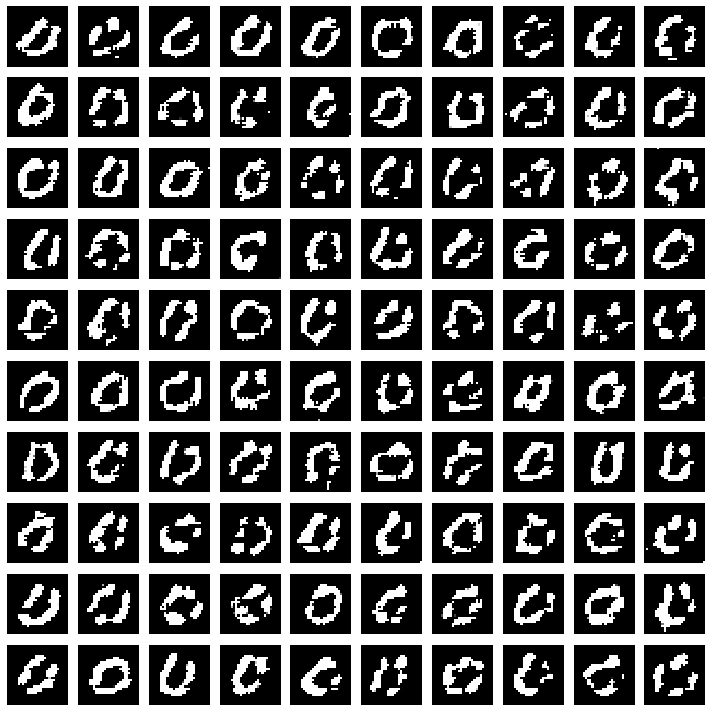

In [0]:
### MODEL PARAMETERS ###
epochs = 20
batch_size = 128

# The main Training Loop.
# The GAN requires a manual loop of gradient descent as we need to generate the model inputs.
for e in range(1, epochs + 1):
    print("Starting epoch", e)
    for _ in range(int(len(x_train) / batch_size)):
        # generate  random noise as an input  to  initialize the  generator
        noise = np.random.normal(0,1, [batch_size, 100])
        # Generate fake MNIST digits from noised input
        generated_images = generator.predict(noise)
        # Get a random set of  real images
        img_batch = x_train[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
        # Concatenate into one dataset 
        X = np.concatenate([img_batch, generated_images])
        # Create the labels (note we dont use probability 1, that would give the discriminator too much power!)
        y = np.zeros(2*batch_size)
        y[:batch_size]= 0.9
        # train discriminator onfake and real data to make it better at telling them apart.
        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        # Generate more noise for the gan
        noise = np.random.normal(0,1, [batch_size, 100])
        y_gen = np.ones(batch_size)

        # Fix the weights of the discriminator.
        discriminator.trainable=False

        # Train the Generative network!
        # we do this by training the whole GAN with the discriminator weights frozen
        # This is becasue we need the entire network.
        gan.train_on_batch(noise, y_gen)
    
plot_generated_images(e, generator)

## Congrats! You made it to the end!
Feel free to ask me any other questions you might have about machine learning!

If you're interested, here are a few more things you can try in this notebook!
1. Combining LSTMs and CNNs for the IMDB Dataset
2. Try making an autoencoder for the MNIST dataset

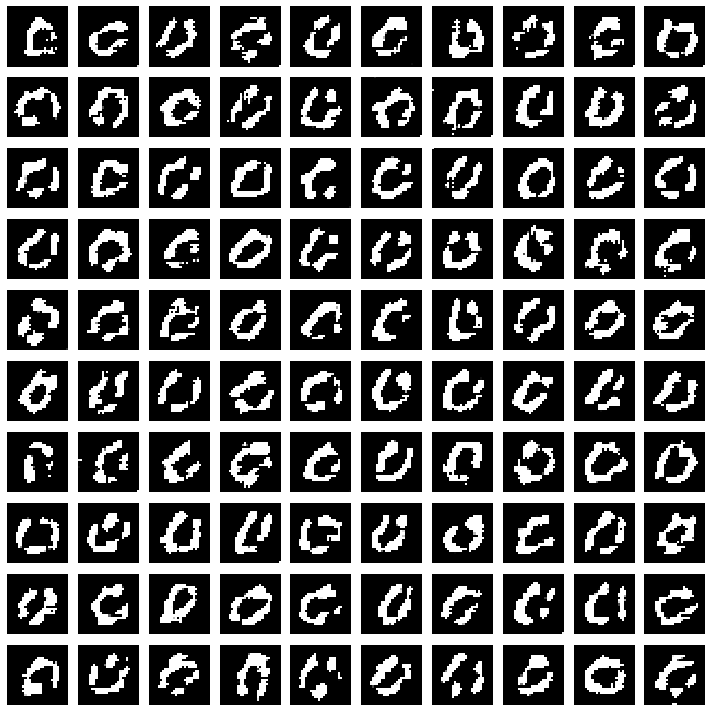

In [0]:
plot_generated_images(e, generator)